In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import json

def load_sample_dataset(file_path, sample_size, random_state=42):
    """ Load a sample of the dataset """
    try:
        df = pd.read_json(file_path, lines=True)
        return df.sample(n=min(sample_size, len(df)), random_state=random_state)
    except Exception as e:
        print(f"Error loading file: {e}")
        return pd.DataFrame()

def plot_rating_distribution(df, category_name):
    """ Plot the distribution of ratings """
    plt.figure(figsize=(10, 6))
    sns.countplot(x='overall', data=df)
    plt.title(f"Rating Distribution in {category_name}")
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

def plot_review_length_distribution(df, category_name, column_name):
    """ Plot the distribution of review lengths """
    df['review_length'] = df[column_name].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length'], bins=50)
    plt.title(f"Review Length Distribution in {category_name}")
    plt.xlabel('Length of Review (Words)')
    plt.ylabel('Count')
    plt.show()

def display_word_cloud(df, column, title):
    """ Display a word cloud for a specific column """
    text = ' '.join(df[column].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Define the file paths and sample sizes for each category
categories = {
    'AMAZON_FASHION': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json',
    'Clothing_Shoes_and_Jewelry': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json',
    'All_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json',
    'Appliances': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Appliances.json',
    'Toys_and_Games': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Toys_and_Games.json',
    'Arts_Crafts_and_Sewing': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Arts_Crafts_and_Sewing.json',
    'Grocery_and_Gourmet_Food': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Grocery_and_Gourmet_Food.json',
    'Tools_and_Home_Improvement': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Tools_and_Home_Improvement.json'
}
sample_size = 50000  

for category, path in categories.items():
    df = load_sample_dataset(path, sample_size)
    if not df.empty:
        plot_rating_distribution(df, category)
        plot_review_length_distribution(df, category, 'reviewText')
        plot_review_length_distribution(df, category, 'summary')
        display_word_cloud(df, 'reviewText', f"Common Words in {category} Reviews")
        display_word_cloud(df, 'summary', f"Common Words in {category} Summaries")



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Processing category: AMAZON_FASHION


/var/folders/gr/rv71m66d06g6mk7zrgz5zysw0000gn/T/ipykernel_57253/188621842.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(chunk.sample(n=min(len(chunk), total_samples - len(sample)), random_state=random_state))
/var/folders/gr/rv71m66d06g6mk7zrgz5zysw0000gn/T/ipykernel_57253/188621842.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(chunk.sample(n=min(len(chunk), total_samples - len(sample)), random_state=random_state))
/var/folders/gr/rv71m66d06g6mk7zrgz5zysw0000gn/T/ipykernel_57253/188621842.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(chunk.sample(n=min(len(chunk), total_samples - len(sample)), random_state=random_state))
/var/folders/

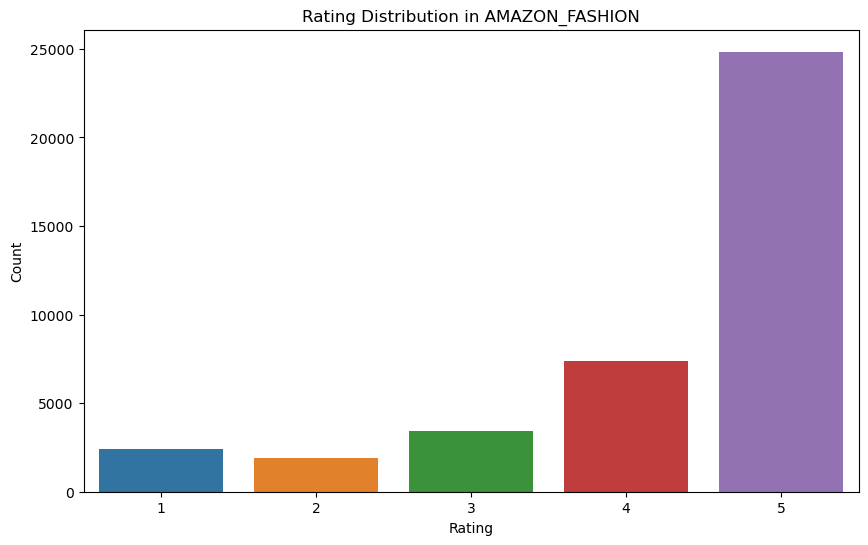

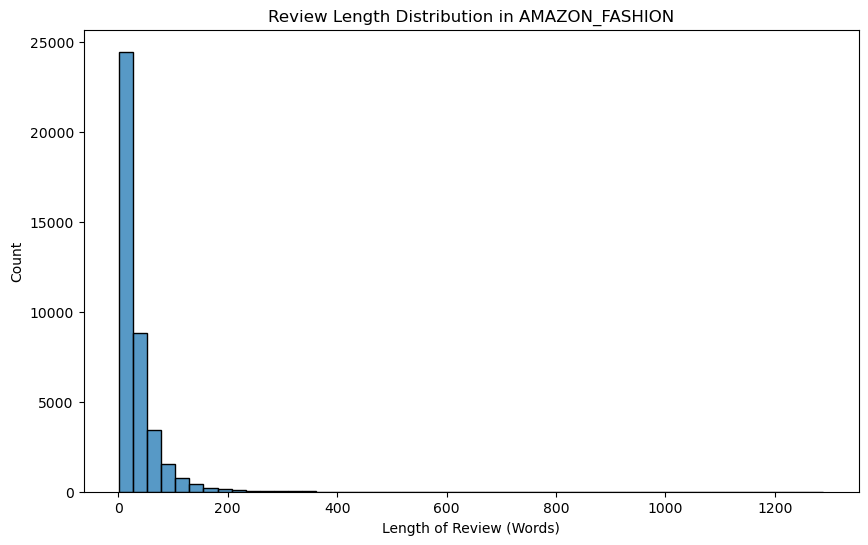

Most common words in reviewText: [('great', 9432), ('fit', 8098), ('good', 6371), ('size', 6074), ('like', 4915), ('shoes', 4803), ('well', 4742), ('love', 4724), ('would', 4639), ('wear', 4341)]
Most common words in summary: [('stars', 11479), ('five', 8042), ('great', 4890), ('good', 2529), ('four', 2141), ('love', 1677), ('hat', 1467), ('fit', 1350), ('perfect', 1143), ('quality', 1069)]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import random
import nltk

nltk.download('punkt')
nltk.download('stopwords')

def load_random_sample(file_path, chunk_size, total_samples, random_state=42):
    sample = pd.DataFrame()
    total_rows = 0

    for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
        total_rows += len(chunk)
        if total_rows >= total_samples:
            break
        sample = sample.append(chunk.sample(n=min(len(chunk), total_samples - len(sample)), random_state=random_state))

    return sample

def plot_rating_distribution(df, category_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(x='overall', data=df)
    plt.title(f"Rating Distribution in {category_name}")
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

def plot_review_length_distribution(df, category_name):
    df['review_length'] = df['reviewText'].str.split().str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length'], bins=50)
    plt.title(f"Review Length Distribution in {category_name}")
    plt.xlabel('Length of Review (Words)')
    plt.ylabel('Count')
    plt.show()

def display_most_common_words(df, column_name, num_words=10):
    text = ' '.join(df[column_name].dropna().astype(str)).lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(num_words)
    print(f"Most common words in {column_name}: {common_words}")

def display_most_common_characters(df, column_name, num_chars=10):
    text = ''.join(df[column_name].dropna().astype(str)).lower()
    char_freq = Counter(text)
    common_chars = char_freq.most_common(num_chars)
    print(f"Most common characters in {column_name}: {common_chars}")

categories = {
    'AMAZON_FASHION': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json',
    'Clothing_Shoes_and_Jewelry': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json',
    'All_Beauty': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json',
    'Appliances': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Appliances.json',
    'Toys_and_Games': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Toys_and_Games.json',
    'Arts_Crafts_and_Sewing': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Arts_Crafts_and_Sewing.json',
    'Grocery_and_Gourmet_Food': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Grocery_and_Gourmet_Food.json',
    'Tools_and_Home_Improvement': '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Tools_and_Home_Improvement.json'
}

chunk_size = 10000
total_samples = 50000

for category, file_path in categories.items():
    print(f"Processing category: {category}")
    df = load_random_sample(file_path, chunk_size, total_samples)
    if not df.empty:
        plot_rating_distribution(df, category)
        plot_review_length_distribution(df, category)
        display_most_common_words(df, 'reviewText', 10)
        display_most_common_words(df, 'summary', 10)
        display_most_common_characters(df, 'reviewText', 10)
        display_most_common_characters(df, 'summary', 10)

print("EDA completed for all categories.")
